# Rearrangement Interactions


In this section, we will show how to caption the figures in reproducing literature.

This is a research article published in Advanced Science (**doi: 10.1002/advs.202200818**), primarily investigating 
the structural variations and three-dimensional genomic interactions in pancreatic cancer. 
It is highly suitable for showcasing the multi-omics and multi-regions plotting capabilities of **trackc**.

Here is part of the **Fig6** from that paper:

<img src=attachment:403b7084-b072-48a8-a912-9f5ee12afe6b.png alt=adv-1 width="36%">
<img src=attachment:0a3d2d4c-bb70-4b13-81e2-ad98ba050d48.png alt=adv-2 width="36%">
<img src=attachment:117fa98d-c44e-4593-ac9f-abfbe60c7111.png alt=adv-2 width="36%">


We will demonstrate the following features of `TrackC`:

1. Multi-omics and multi-region plotting: 

TrackC can simultaneously plot multiple omics data (such as gene track, zoomin, ChIP signal, etc.) across multiple regions. This enables researchers to analyze the differences and interactions between different regions comprehensively.

2. Visualization of three-dimensional genomic interactions: 

TrackC has the capability to visualize three-dimensional genomic interactions by plotting chromatin conformation data. This reveals the spatial organization and interactions between genes, aiding in understanding the complexity and functionality of gene regulatory networks.

3. Structural variation analysis: 

TrackC provides structural variation analysis, detecting and visualizing genomic structural variations in cancer samples, such as chromosomal rearrangements, insertions, and deletions. This helps researchers understand the role of structural variations in the occurrence and development of cancer.

4. Data interactivity and export: 

TrackC supports user interaction with the plotted charts and offers data export functionality for further analysis and sharing of research findings. By showcasing these features, we will demonstrate the value and potential applications of TrackC in cancer research.
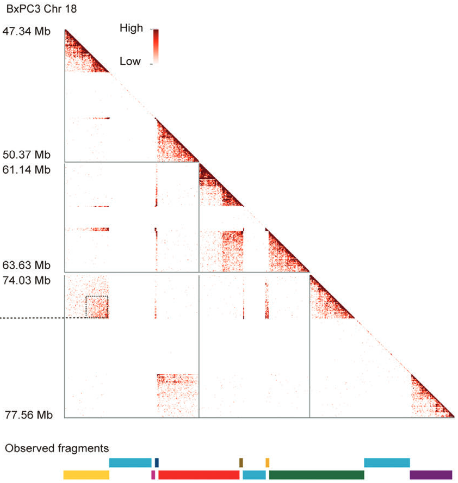
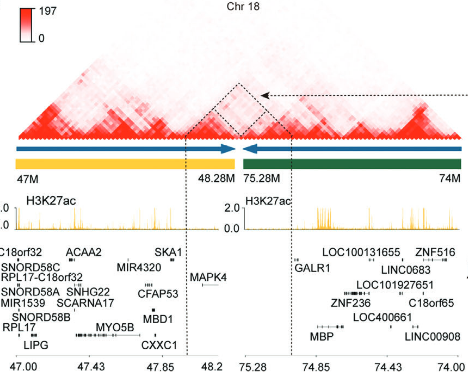
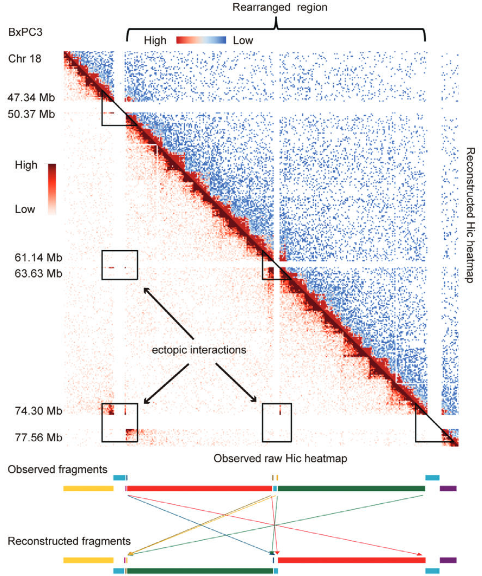

**Test data**

**Hi-C cool format matrix data**

* https://github.com/seqyuan/trackc_data/examples

**BxPC3 ChIP-seq data**

* https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3178671

In [1]:
from imp import reload
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys,os
import cooler

os.chdir('./github/seqyuan/trackc_data/examples')
import trackc as tc
import pyBigWig

BxPC3_chr18_50k = cooler.Cooler('./BxPC3.chr18.mcool::/resolutions/50000')
HPDE6C7_chr18_50k = cooler.Cooler('./HPDE6C7.chr18.mcool::/resolutions/50000')
BxPC3_chr18_10k = cooler.Cooler('./BxPC3.chr18.mcool::/resolutions/10000')
BxPC3_chr18_25k = cooler.Cooler('./BxPC3.chr18.mcool::/resolutions/25000')
H3K27ac = pyBigWig.open('./GSM3178671_BxPC3_H3K27ac.bigwig')

full_regions = "18:45000000-78077248"
mark_regions=["18:47340000-50370000", "18:61140000-63630000", "18:74030000-77560000"]
zoom_regions = ['18:47400000-48280000', '18:75280000-74030000']
neo_domain_regions = ['18:47950000-48280000', '18:75280000-74850000']

gene_bed12 = pd.read_table("hg19_chr18.bed12", sep="\t", header=None)
gene_bed12[0] = gene_bed12[0].str.lstrip('chr')
display(gene_bed12.head(3))

,0,1,2,3,4,5,6,7,8,9,10,11
0,18,11103,16352,LINC02564,0,+,16352,16352,0,5,"492,205,470,202,735","11103,15617,11125,13152,15617"
1,18,47221,49615,TUBB8B,0,-,49615,49615,0,6,"1226,110,108,114,687,129","47221,48940,49129,49501,47928,48753"
2,18,80140,88570,IL9RP4,0,-,88570,88570,0,8,"313,105,181,113,171,111,136,110","80140,84043,84729,85588,86111,86398,86930,88460"


**extract region contacts from cool**

In [2]:
norml = tc.tl.extractContactRegions(clr=HPDE6C7_chr18_50k, row_regions=full_regions)
tumor = tc.tl.extractContactRegions(clr=BxPC3_chr18_50k, row_regions=full_regions)
tumor_mark = tc.tl.extractContactRegions(clr=BxPC3_chr18_25k, row_regions=mark_regions)
tumor_zoom = tc.tl.extractContactRegions(clr=BxPC3_chr18_25k, row_regions=zoom_regions)

maxrange: 70 minrange: 1


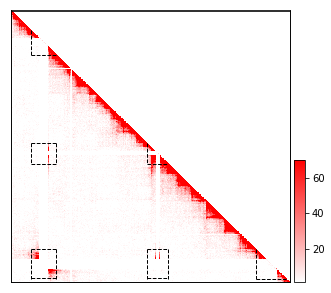

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5) )

tc.pl.mapC(mat2=tumor.cmat, ax=ax, map_type='square', cmap=tc.pa.fruitpunch, maxrange=70, minrange=1, symmetric=False)
tc.pl.mapc_markline(row_regions=tumor.row_regions, mark_regions=mark_regions, 
                    binsize=50000, ax=ax, map_order=1, symmetric=False, only_cis=False)

#fig.savefig('trackc_mark_rearrange2.pdf')

**multi regions**

maxrange: 70 minrange: 1


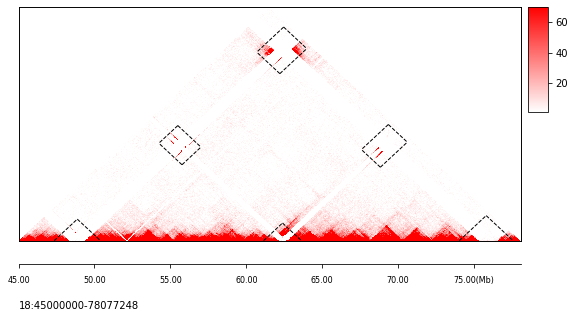

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4.3) )

tc.pl.mapC(ax=ax, mat=tumor.cmat, map_type='triangle', maxrange=70, minrange=1, symmetric=False)
tc.pl.mapc_markline(row_regions=tumor.row_regions, map_type="triangle",
                        mark_regions=mark_regions,
                        binsize=50000, ax=ax, map_order=0, symmetric=False)

tc.pl.scale_track(ax, region=full_regions, scale_adjust='Mb', tick_pos='bottom', ratio2ax=0.2)


In [5]:
full_regions

'18:45000000-78077248'

maxrange: 70 minrange: 1
maxrange: 70 minrange: 1


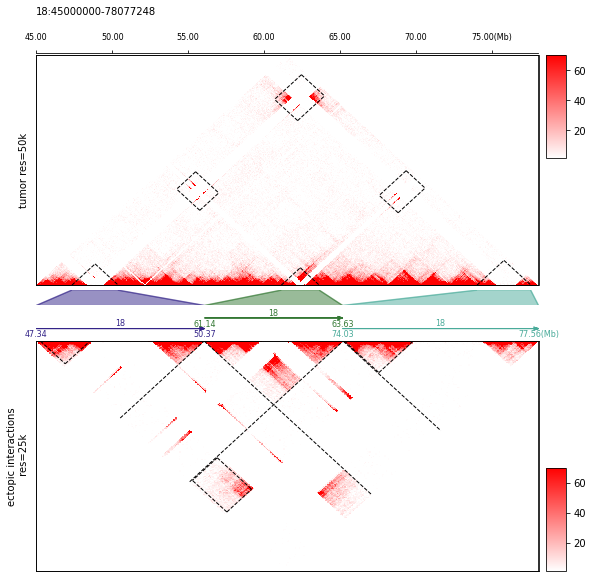

In [11]:

fig, axs = tc.make_spec(figsize=(9, 9.5), height_ratios=[4.5, 0.3, 0.5, 4.5], hspace=0.04)

tc.pl.scale_track(axs[0], region=full_regions, scale_adjust='Mb', tick_pos='top', ratio2ax=0.2, space=0.01)
tc.pl.mapC(mat=tumor.cmat, ax=axs[0], map_type='triangle', maxrange=70, minrange=1, 
           symmetric=False, label='tumor res=50k')

tc.pl.mapc_markline(row_regions=tumor.row_regions, map_type="triangle",
                        mark_regions=mark_regions,
                        binsize=50000, ax=axs[0], map_order=0, symmetric=False)

tc.pl.zoomin(axs[1], [full_regions], mark_regions, line_on=True, fill=True, alpha=0.5)
tc.pl.multi_scale_track(axs[2],
                        regions=mark_regions,
                        scale_adjust='Mb',
                        intervals =2,
                        tick_rotation=0)
tc.pl.mapC(mat2=tumor_mark.cmat, ax=axs[3], map_type='triangle', cmap=tc.pa.fruitpunch,
           maxrange=70, minrange=1, symmetric=False, label='ectopic interactions\n res=25k')

tc.pl.mapc_markline(row_regions=tumor_mark.row_regions, map_type="triangle",
                        mark_regions=zoom_regions, 
                        binsize=25000, ax=axs[3], map_order=1, symmetric=False, show_regions_edge=True)



#fig.savefig('ectopic.pdf')
#plt.tight_layout()

#plt.savefig('ectopic.pdf', bbox_inches='tight')


maxrange: 70 minrange: 1
maxrange: 70 minrange: 1
maxrange: 200 minrange: 10


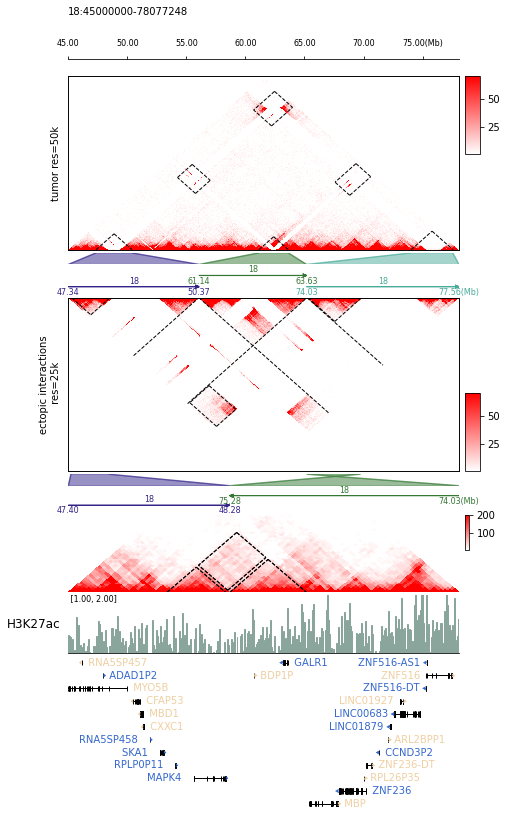

In [7]:

fig, axs = tc.make_spec(figsize=(7, 13.5), 
                        height_ratios=[4.5, 0.3, 0.7, 4.5, 0.3, 0.6, 2, 1.5, 4], 
                        hspace=0.04)

tc.pl.scale_track(axs[0], region=full_regions, scale_adjust='Mb', tick_pos='top', ratio2ax=0.3)
tc.pl.mapC(mat=tumor.cmat, ax=axs[0], map_type='tri', 
           maxrange=70, minrange=1, 
           symmetric=False, label='tumor res=50k')

tc.pl.mapc_markline(row_regions=tumor.row_regions, map_type="triangle",
                        mark_regions=mark_regions,
                        binsize=50000, ax=axs[0], map_order=0, symmetric=False)

tc.pl.zoomin(axs[1], [full_regions], mark_regions, line_on=True, fill=True, alpha=0.5)
tc.pl.multi_scale_track(axs[2],
                        regions=mark_regions,
                        scale_adjust='Mb',
                        intervals =2,
                        tick_rotation=0)
tc.pl.mapC(mat2=tumor_mark.cmat, ax=axs[3], map_type='triangle', cmap=tc.pa.fruitpunch,
           maxrange=70, minrange=1, symmetric=False, label='ectopic interactions\n res=25k')

tc.pl.mapc_markline(row_regions=tumor_mark.row_regions, map_type="triangle",
                        mark_regions=zoom_regions,
                        binsize=25000, ax=axs[3], map_order=1, symmetric=False, show_regions_edge=True)

tc.pl.zoomin(axs[4], mark_regions, zoom_regions, line_on=True, fill=True, alpha=0.5)

tc.pl.multi_scale_track(axs[5],
                        regions=zoom_regions,
                        scale_adjust='Mb',
                        intervals =2,
                        tick_rotation=0)


tc.pl.mapC(mat=tumor_zoom.cmat, ax=axs[6], map_type='triangle',
               maxrange=200, minrange=10, symmetric=False, label='tumor res=25k', ax_on=False, height=40)


tc.pl.mapc_markline(row_regions=tumor_zoom.row_regions, 
                        map_type="triangle",
                        mark_regions=neo_domain_regions,
                        binsize=25000, 
                        ax=axs[6], 
                        map_order=0, symmetric=False, show_regions_edge=False)

tc.pl.mapc_markline(row_regions=tumor_zoom.row_regions, 
                        map_type="triangle",
                        mark_regions=neo_domain_regions,
                        binsize=25000, 
                        ax=axs[6], 
                        map_order=0, symmetric=False, show_regions_edge=False)

tc.pl.bw_track(H3K27ac, 
               ax=axs[7], 
               regions=neo_domain_regions,
               label='H3K27ac', binsize=2000,
               color='#8AA69C', maxrange=2)

tc.pl.gene_track(ax=axs[8], bed12=gene_bed12,
               regions=zoom_regions,
               line=12,
               gene_fontszie=10
               )


**quick layout**

Before generating the plots, you can use the **ten.show()** function to quickly adjust the layout and ensure appropriate proportions between tracks.


```python
ten = tc.tenon(width=6, height=1)
ten.add(pos='bottom', height=0.6, hspace=0)
ten.add(pos='bottom', height=5, hspace=0.05)
ten.add(pos='bottom', height=1, hspace=0.05)
ten.add(pos='bottom', height=1, hspace=0.05)
ten.add(pos='bottom', height=1, hspace=0.05)
ten.add(pos='bottom', height=3, hspace=0.05)
ten.show()
```

maxrange: 70 minrange: 1
maxrange: 70 minrange: 1
maxrange: 200 minrange: 10


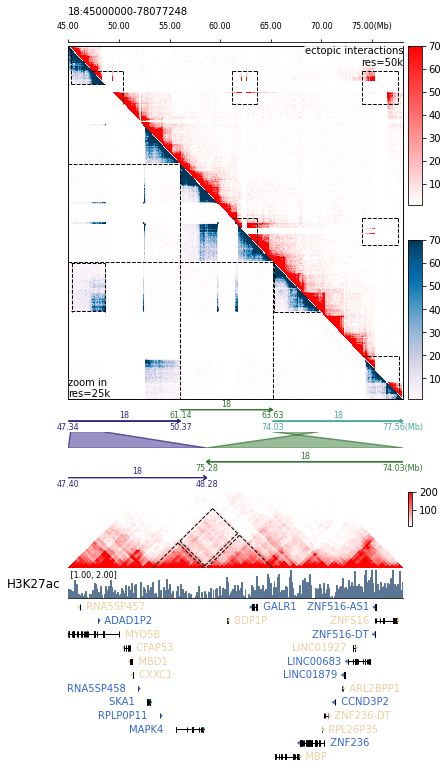

In [8]:
ten = tc.tenon(figsize=(6,1))
ten.add(pos='bottom', height=6.5, hspace=0.05)
ten.add(pos='bottom', height=0.5, hspace=0.05)
ten.add(pos='bottom', height=0.3, hspace=0.05)
ten.add(pos='bottom', height=0.7, hspace=0.05)
ten.add(pos='bottom', height=1.4, hspace=0.05)
ten.add(pos='bottom', height=0.5, hspace=0.05)
ten.add(pos='bottom', height=3, hspace=0.05)

tc.pl.mapC(ax=ten.axs(0), mat=tumor.cmat, mat2=tumor_mark.cmat, map_type='squ', 
           maxrange=70, minrange=1, cmap=[tc.pa.fruitpunch, 'PuBu'],
           label=['ectopic interactions\nres=50k', 'zoom in\nres=25k'])

tc.pl.mapc_markline(row_regions=tumor.row_regions, map_type="squ",
                        mark_regions=mark_regions,
                        binsize=50000, ax=ten.axs(0), map_order=0, symmetric=False)

tc.pl.mapc_markline(row_regions=tumor_mark.row_regions, map_type="squ",
                        mark_regions=zoom_regions,
                        binsize=25000, ax=ten.axs(0), map_order=1, symmetric=False, show_regions_edge=True)

tc.pl.scale_track(ten.axs(0), region=full_regions, scale_adjust='Mb', tick_pos='top', ratio2ax=0.1, space=0.01)


tc.pl.multi_scale_track(ten.axs(1),
                        regions=mark_regions,
                        scale_adjust='Mb',
                        intervals =2,
                        tick_rotation=0)

tc.pl.zoomin(ten.axs(2), mark_regions, zoom_regions, line_on=True, fill=True, alpha=0.5)

tc.pl.multi_scale_track(ten.axs(3),
                        regions=zoom_regions,
                        scale_adjust='Mb',
                        intervals =2,
                        tick_rotation=0)

tc.pl.mapC(ax=ten.axs(4), mat=tumor_zoom.cmat, map_type='triangle',
           maxrange=200, minrange=10, symmetric=False, 
           label='tumor res=25k', ax_on=False, height=40)


tc.pl.mapc_markline(ax=ten.axs(4), row_regions=tumor_zoom.row_regions, 
                        map_type="triangle",
                        mark_regions=neo_domain_regions,
                        binsize=25000, 
                        map_order=0, symmetric=False, show_regions_edge=False)

tc.pl.bw_track(H3K27ac, 
               ax=ten.axs(5), regions=neo_domain_regions,
               label='H3K27ac', binsize=2000, color=['#5B7695'], maxrange=2)

tc.pl.gene_track(ax=ten.axs(6), bed12=gene_bed12,
                 regions=zoom_regions,
                 track_type = 'gene',
                 line=12,
                 gene_fontszie = 10)

#tc.savefig('trackc_rearrange-f.pdf')


* https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE157927

maxrange: 200 minrange: 10


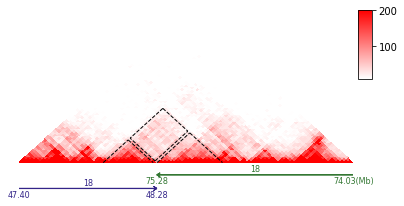

In [10]:
ten = tc.tenon(figsize=(6,1))
ten.add(pos='bottom', height=2.8, hspace=0.05)
ten.add(pos='bottom', height=0.6, hspace=0.05)


tc.pl.mapC(ax=ten.axs(0), mat=tumor_zoom.cmat, map_type='tri', 
               maxrange=200, minrange=10, ax_on=False)
tc.pl.mapc_markline(ax=ten.axs(0), row_regions=tumor_zoom.row_regions, 
                        map_type="triangle",
                        mark_regions=neo_domain_regions,
                        binsize=25000, 
                        map_order=0, symmetric=False, show_regions_edge=False)

tc.pl.multi_scale_track(ten.axs(1),
                        regions=zoom_regions,
                        scale_adjust='Mb',
                        intervals=2,
                        tick_rotation=0)

#tc.savefig('trackc_neotad.pdf')